In [1]:
import pandas as pd
from geojson import LineString, dump, Feature, FeatureCollection
import matplotlib as mp

C:\Users\rouma\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [12]:
df = pd.read_csv("C:\\Users\\rouma\\Documents\\BlueRock\\Projekt\\gpsData.csv")
#df["Longitude", "Latitude"].to_list()
print(df.columns)
df['latlongTuple'] = list(zip(df.Longitude, df.Latitude))


Index(['Longitude', 'Latitude', 'DeviceTime'], dtype='object')


In [19]:
line = LineString([(8.919, 44.4074), (8.923, 44.4075)])  # doctest: +ELLIPSIS
{"coordinates": [[8.91, 44.407], [8.92, 44.407]], "type": "LineString"}

features = []
features.append(Feature(geometry=line, properties={"country": "Canada"}))
    
feature_collection = FeatureCollection(features)
    
with open('C:\\Users\\rouma\\JupyterNotebooks\\myfile1.geojson', 'w') as f:
    dump(feature_collection, f)

In [13]:
tuplelist = []
for i in df['latlongTuple']:
    tuplelist.append(i)
tuplelist

[(-73.4245, 45.5575),
 (-73.4245, 45.5575),
 (-73.4247, 45.5569),
 (-73.425, 45.5566),
 (-73.4252, 45.5564),
 (-73.426, 45.5559),
 (-73.4288, 45.558),
 (-73.429, 45.5583),
 (-73.426, 45.5609),
 (-73.437, 45.5621),
 (-73.437, 45.5621),
 (-73.4368, 45.5621),
 (-73.4371, 45.5619),
 (-73.4374, 45.5621),
 (-73.4371, 45.563),
 (-73.4368, 45.5634),
 (-73.437, 45.5637),
 (-73.4401, 45.5644),
 (-73.4407, 45.5646),
 (-73.4413, 45.5647),
 (-73.4417, 45.5645),
 (-73.442, 45.5643),
 (-73.4425, 45.5642),
 (-73.4441, 45.5653),
 (-73.4441, 45.5657),
 (-73.4434, 45.5664),
 (-73.443, 45.5666),
 (-73.4432, 45.5676),
 (-73.4435, 45.5678),
 (-73.444, 45.5683),
 (-73.4442, 45.5686),
 (-73.4416, 45.5694),
 (-73.4413, 45.5696),
 (-73.441, 45.5699),
 (-73.441, 45.5702),
 (-73.4412, 45.5704),
 (-73.4419, 45.571),
 (-73.4424, 45.5712),
 (-73.4484, 45.5726),
 (-73.4686, 45.5769),
 (-73.488, 45.5811),
 (-73.5114, 45.586),
 (-73.5176, 45.5878),
 (-73.5194, 45.5882),
 (-73.5214, 45.5883),
 (-73.5235, 45.5885),
 (-73

In [14]:

line = LineString(tuplelist)

features = []
features.append(Feature(geometry=line, properties={"country": "Canada"}))
    
feature_collection = FeatureCollection(features)
    
with open('C:\\Users\\rouma\\JupyterNotebooks\\myfile1.geojson', 'w') as f:
    dump(feature_collection, f)

## Second csv from json file

In [4]:
#dfFromJson = pd.read_csv("C:\\Users\\rouma\\Documents\\BlueRock\\Projekt\\gpsSeriesFromJson.csv")
dfFromJson = pd.read_csv(r"C:\Users\rouma\Documents\BlueRock\Projekt\gpsData\gpsData\A9217\gpsSeriesA9217.csv")
#df["Longitude", "Latitude"].to_list()
print(dfFromJson.columns)
dfFromJson['latlongTuple'] = list(zip(dfFromJson.lon, dfFromJson.lat))

#Tuple list of coordinates
tuplelistFromJson = []
for i in dfFromJson['latlongTuple']:
    tuplelistFromJson.append(i)
#tuplelistFromJson

Index(['alt', 'batPct', 'gpsAt', 'heading', 'lat', 'lon', 'speed'], dtype='object')


In [5]:
dfFromJson.head()

,alt,batPct,gpsAt,heading,lat,lon,speed,latlongTuple
0,160,95,2021-08-24T06:51:07Z,124,43.7039,-79.5842,0,"(-79.5842, 43.7039)"
1,156,94,2021-08-24T06:50:57Z,144,43.7040,-79.5848,6,"(-79.5848, 43.704)"
2,157,94,2021-08-24T06:50:23Z,164,43.7045,-79.5851,10,"(-79.5851, 43.7045)"
3,131,94,2021-08-24T06:50:04Z,348,43.7054,-79.5843,2,"(-79.5843, 43.7054)"
4,131,100,2021-08-24T02:03:41Z,348,43.7054,-79.5843,2,"(-79.5843, 43.7054)"


In [11]:
#### Convert to a GeoJson file ####
lineFromJson = LineString(tuplelistFromJson)

featuresFromJson = []
featuresFromJson.append(Feature(geometry=lineFromJson, properties={"country": "Canada"}))
    
feature_collectionFromJson = FeatureCollection(featuresFromJson)
    
with open('C:\\Users\\rouma\\JupyterNotebooks\\myfileFromJsonNew.geojson', 'w') as f:
    dump(feature_collectionFromJson, f)

In [7]:
dfFromJson.columns

Index(['alt', 'batPct', 'gpsAt', 'heading', 'lat', 'lon', 'speed',
       'latlongTuple'],
      dtype='object')

In [6]:
df.plot(kind='scatter', x='Longitude', y='Latitude')
dfFromJson.plot(kind='scatter', x='lat', y='speed', s = 3)

dateList = []
for d in dfFromJson['gpsAt']:
    dateList.append(pd.to_datetime(d))
dfFromJson['Date'] = dateList
#dfFromJson['Date'] = dfFromJson['Date'].dt.tz_localize(None)
dfFromJson['Date'][1]
#dfFromJson.plot(kind='scatter', x='Date', y='speed')


#################################
# Calculate time deltas against speed
#################################

Timestamp('2021-08-24 06:50:57+0000', tz='UTC')

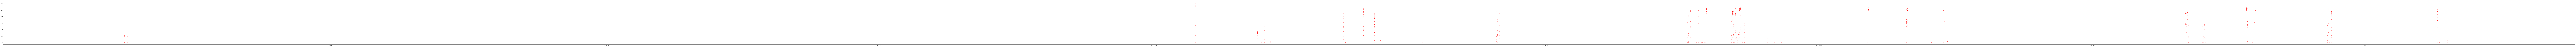

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
type(dfFromJson['Date'][0])
dfFromJson
#dfFromJson.plot(kind='scatter', x='Date', y='speed', s = 3)
#dfFromJson.plot(x='Date', y='speed', lw=0, marker='o', figsize=(300,4), ms = 1)
plt.figure(figsize=(460, 8), dpi=90)
plt.scatter(dfFromJson['Date'], dfFromJson['speed'], s =1, c = 'red')

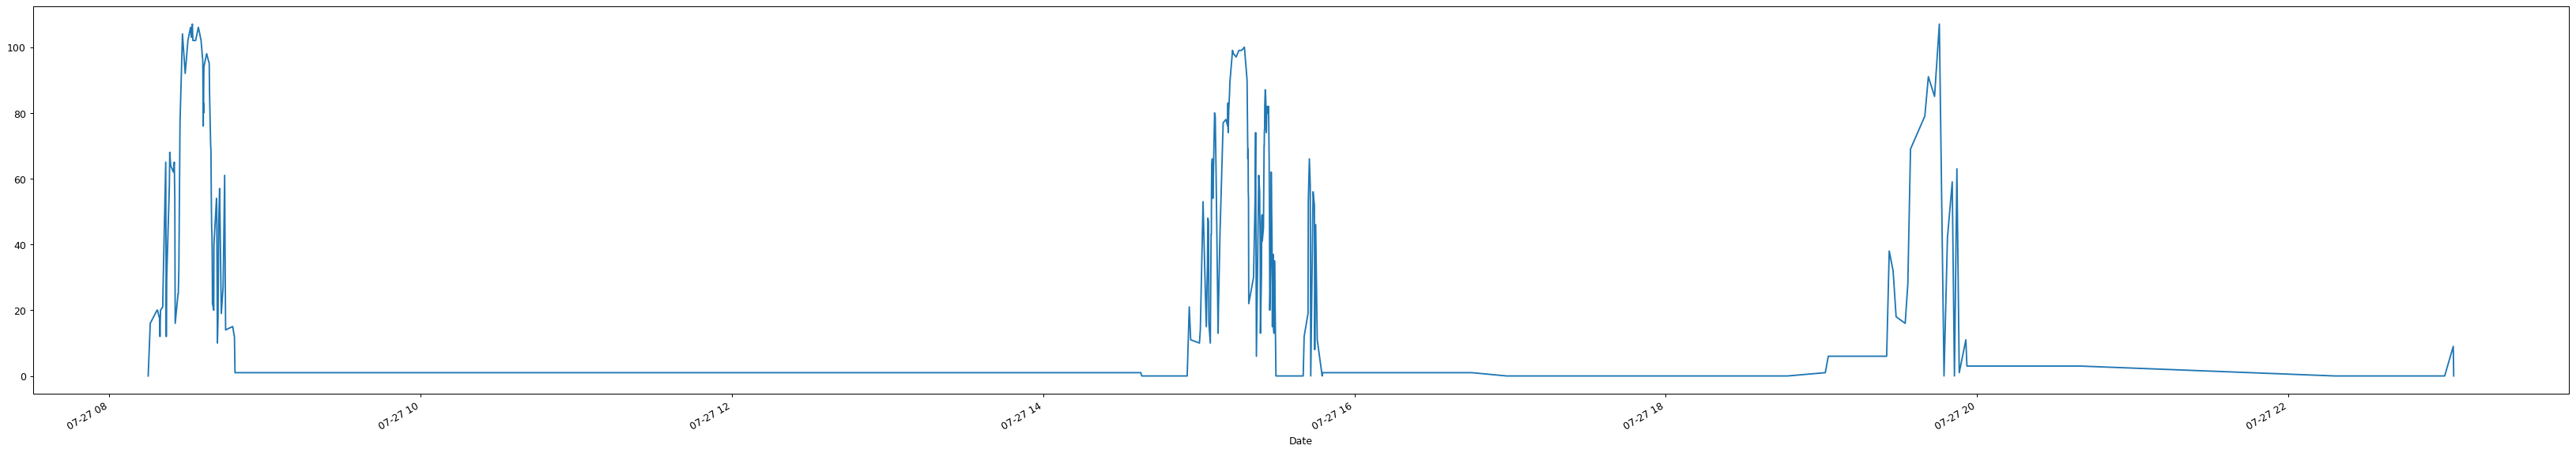

,alt,batPct,gpsAt,heading,lat,lon,speed,latlongTuple
Date,,,,,,,,
2021-07-27 08:15:02+00:00,182,96,2021-07-27T08:15:02Z,102,43.6184,-79.7934,0,"(-79.7934, 43.6184)"
2021-07-27 08:15:50+00:00,151,96,2021-07-27T08:15:50Z,140,43.6165,-79.7906,16,"(-79.7906, 43.6165)"
2021-07-27 08:18:26+00:00,159,97,2021-07-27T08:18:26Z,142,43.6161,-79.7901,20,"(-79.7901, 43.6161)"
2021-07-27 08:18:38+00:00,167,97,2021-07-27T08:18:38Z,48,43.6161,-79.7895,20,"(-79.7895, 43.6161)"
2021-07-27 08:19:14+00:00,165,97,2021-07-27T08:19:14Z,42,43.6174,-79.7874,18,"(-79.7874, 43.6174)"
...,...,...,...,...,...,...,...,...
2021-07-27 22:18:02+00:00,117,92,2021-07-27T22:18:02Z,0,43.6271,-79.5322,0,"(-79.5322, 43.6271)"
2021-07-27 22:19:59+00:00,68,91,2021-07-27T22:19:59Z,146,43.6271,-79.5325,0,"(-79.5325, 43.6271)"
2021-07-27 23:00:15+00:00,68,100,2021-07-27T23:00:15Z,146,43.6271,-79.5325,0,"(-79.5325, 43.6271)"


In [279]:
import matplotlib.dates as mdates
#dfJson_Small = dfFromJson[1:100]
dfJson_Small = dfFromJson[(dfFromJson['Date'] >= '2021-07-27') & (dfFromJson['Date'] < '2021-07-28')]
dfJson_Small = dfJson_Small.iloc[::-1] #Turn df upside down
# dfJson_Small['Date'].dt.time.to_list()[1]
plt.figure(figsize=(46, 8), dpi=90)
#plt.scatter(dfJson_Small['Date'].dt.time.to_list(), dfJson_Small['speed'], s =2, c = 'red')
#type(dfJson_Small['Date'][1])


dfJson_Small.set_index('Date', inplace=True)
ax = dfJson_Small['speed'].plot()

ticklabels = dfJson_Small.index.strftime('%H:%M:%S')
ax.xaxis.set_label(ticklabels)

#plt.rcParams["date.autoformatter.minute"] = "%Y-%m-%d %H:%M:%S"
#ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.show()

dfJson_Small

## Calculate distance, avg. speed and compare to given speed.

In [280]:
from math import cos, asin, sqrt, pi
from datetime import datetime

def distanceInKm(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a))

def distanceInKm1(latDiff, lonDiff, lat1, lat2):
    p = pi/180
    a =  0.5 - cos((latDiff)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lonDiff)*p))/2
    return 12742*asin(sqrt(a))

def timeInSecs(t1, t2):
    try:
        time1 = datetime.strptime(t1,'%Y-%m-%dT%H:%M:%S%z')
        time2 = datetime.strptime(t2,'%Y-%m-%dT%H:%M:%S%z')
        secDifference = (time2-time1).total_seconds()
    except: 
        
        return 0
    return secDifference



distances = [distanceInKm(lat1, lat2, lon1, lon2) for lat1, lat2, lon1, lon2 in zip(dfJson_Small['lat'], dfJson_Small['lon'], dfJson_Small['lat'].shift(1),  dfJson_Small['lon'].shift(1))]
time = [timeInSecs(t1, t2) for t1, t2 in zip(dfJson_Small['gpsAt'].shift(1), dfJson_Small['gpsAt'])]
time
timeInHour = [x / (60*60) for x in time]


avgSpeed = []
for i in range(len(time)):
    try:
        avgSpeed.append(distances[i] / timeInHour[i])
    except:
        avgSpeed.append(np.nan)
dfJson_Small['avgSpeed'] = avgSpeed
dfJson_Small


,alt,batPct,gpsAt,heading,lat,lon,speed,latlongTuple,avgSpeed
Date,,,,,,,,,
2021-07-27 08:15:02+00:00,182,96,2021-07-27T08:15:02Z,102,43.6184,-79.7934,0,"(-79.7934, 43.6184)",NaN
2021-07-27 08:15:50+00:00,151,96,2021-07-27T08:15:50Z,140,43.6165,-79.7906,16,"(-79.7906, 43.6165)",23.170197
2021-07-27 08:18:26+00:00,159,97,2021-07-27T08:18:26Z,142,43.6161,-79.7901,20,"(-79.7901, 43.6161)",1.384318
2021-07-27 08:18:38+00:00,167,97,2021-07-27T08:18:38Z,48,43.6161,-79.7895,20,"(-79.7895, 43.6161)",14.490484
2021-07-27 08:19:14+00:00,165,97,2021-07-27T08:19:14Z,42,43.6174,-79.7874,18,"(-79.7874, 43.6174)",22.242950
...,...,...,...,...,...,...,...,...,...
2021-07-27 22:18:02+00:00,117,92,2021-07-27T22:18:02Z,0,43.6271,-79.5322,0,"(-79.5322, 43.6271)",0.049912
2021-07-27 22:19:59+00:00,68,91,2021-07-27T22:19:59Z,146,43.6271,-79.5325,0,"(-79.5325, 43.6271)",0.742967
2021-07-27 23:00:15+00:00,68,100,2021-07-27T23:00:15Z,146,43.6271,-79.5325,0,"(-79.5325, 43.6271)",0.000000


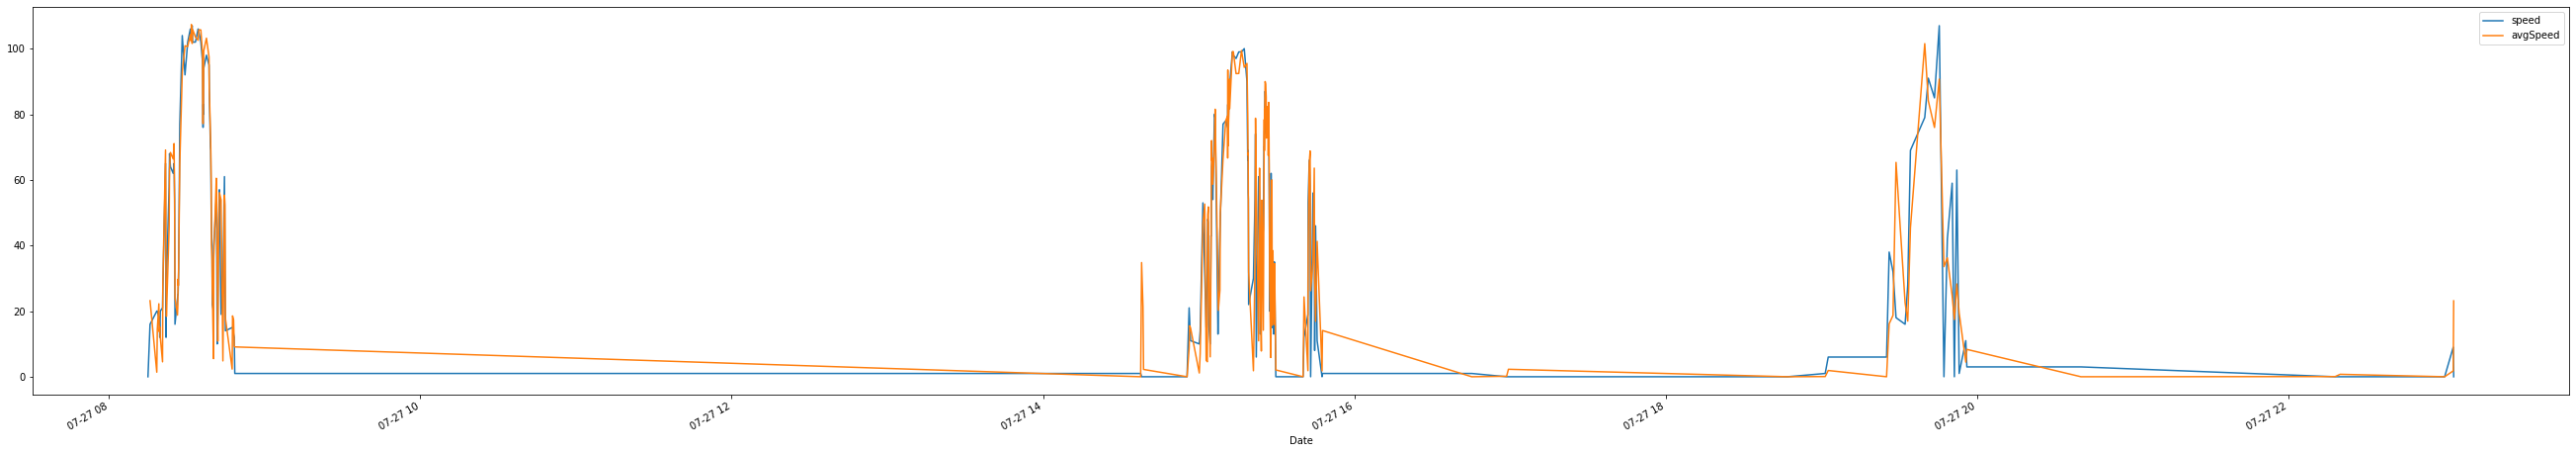

In [281]:
dfJson_Small[['speed', 'avgSpeed']].plot(figsize=(46, 8))

C:\Users\rouma\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\rouma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\rouma\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


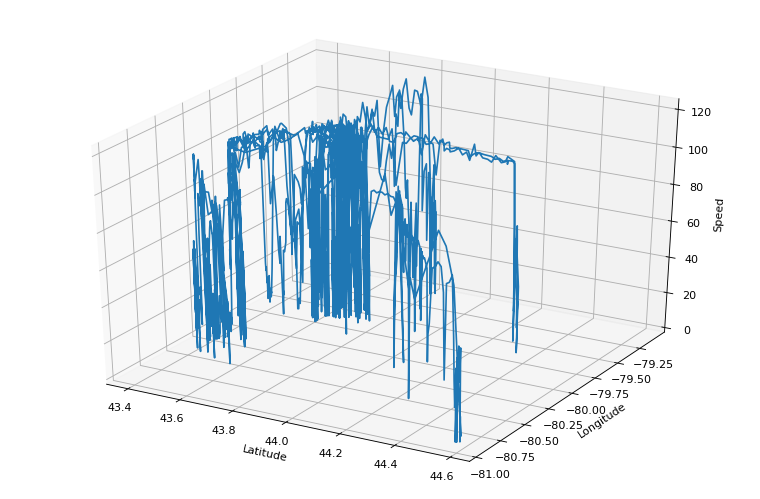

In [45]:
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure(figsize=(12, 8), dpi=80).gca(projection='3d')
threedee.set(zlabel = 'Speed')
threedee.plot(dfFromJson['lat'], dfFromJson['lon'], dfFromJson['speed'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
#plt.zlabel('Speed')
plt.show()

#No distribution we can fit to the data, (lat,lon) is esentially random

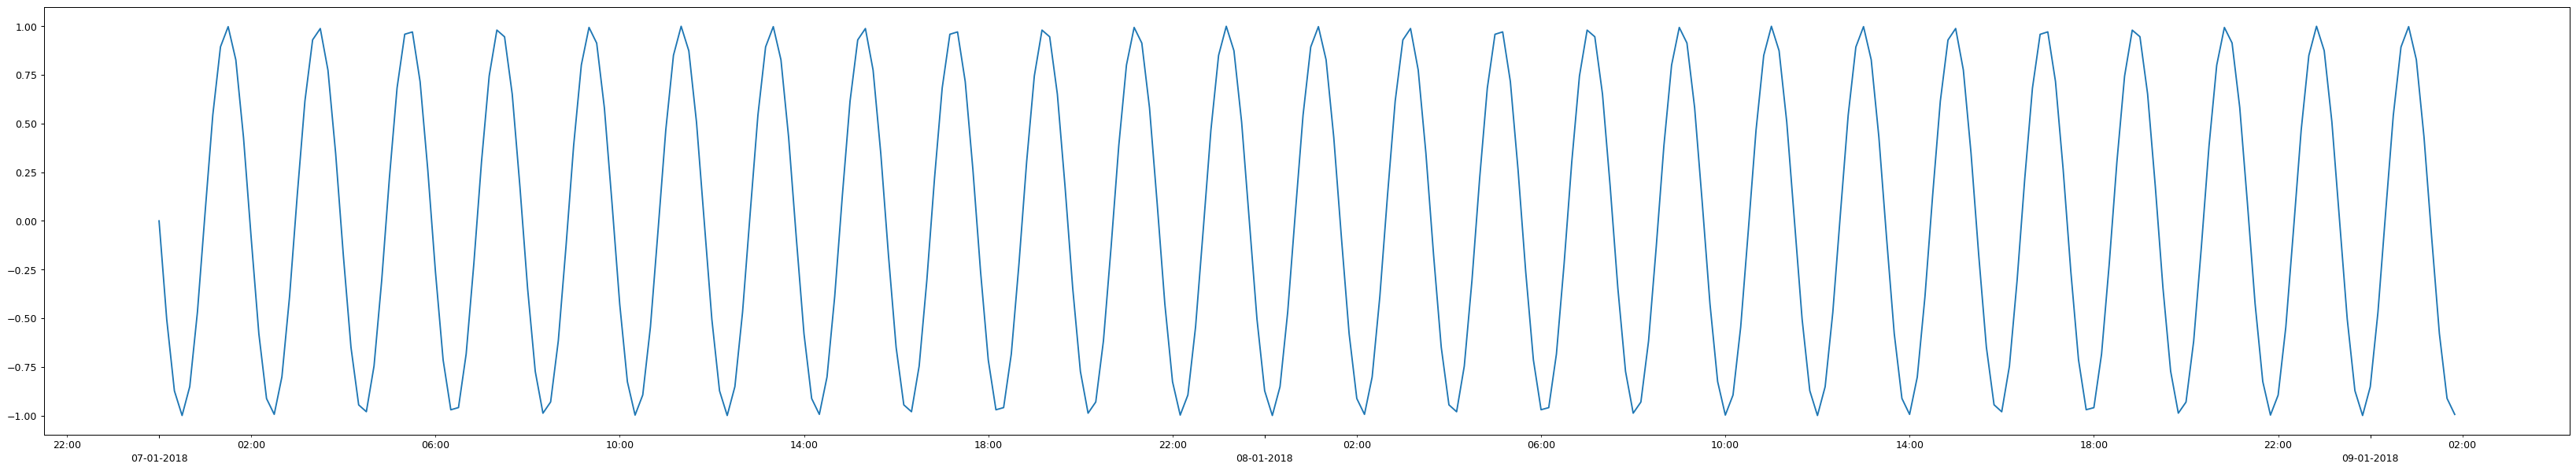

In [225]:
import numpy as np
import matplotlib.dates as dates
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(46, 8), dpi=90)
idx = pd.date_range('2018-01-07', '2018-01-09', freq='10min')
# generate a time range series with 10 min intervals
idx = np.arange('2018-01-07T00', '2018-01-09T02', 10, dtype='datetime64[m]')
# some random data
y = np.sin(np.arange(idx.shape[0]) / 0.01)

ax.plot_date(idx, y, '-')

ax.xaxis.set_minor_locator(dates.HourLocator(interval=4))   # every 4 hours
ax.xaxis.set_minor_formatter(dates.DateFormatter('%H:%M'))  # hours and minutes
ax.xaxis.set_major_locator(dates.DayLocator(interval=1))    # every day
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%d-%m-%Y')) 


In [282]:
import matplotlib.pyplot as plt
df = dfJson_Small
df = df.reset_index()
date = df['Date'][0]
date.to_pydatetime()
df['Date'] = df['Date'].dt.tz_localize(None)
dates = [d.to_pydatetime() for d in df['Date']]
dates

[datetime.datetime(2021, 7, 27, 8, 15, 2),
 datetime.datetime(2021, 7, 27, 8, 15, 50),
 datetime.datetime(2021, 7, 27, 8, 18, 26),
 datetime.datetime(2021, 7, 27, 8, 18, 38),
 datetime.datetime(2021, 7, 27, 8, 19, 14),
 datetime.datetime(2021, 7, 27, 8, 19, 23),
 datetime.datetime(2021, 7, 27, 8, 19, 35),
 datetime.datetime(2021, 7, 27, 8, 19, 47),
 datetime.datetime(2021, 7, 27, 8, 20, 39),
 datetime.datetime(2021, 7, 27, 8, 20, 45),
 datetime.datetime(2021, 7, 27, 8, 21, 48),
 datetime.datetime(2021, 7, 27, 8, 21, 54),
 datetime.datetime(2021, 7, 27, 8, 22),
 datetime.datetime(2021, 7, 27, 8, 22, 9),
 datetime.datetime(2021, 7, 27, 8, 23, 12),
 datetime.datetime(2021, 7, 27, 8, 23, 21),
 datetime.datetime(2021, 7, 27, 8, 23, 42),
 datetime.datetime(2021, 7, 27, 8, 24, 45),
 datetime.datetime(2021, 7, 27, 8, 25, 6),
 datetime.datetime(2021, 7, 27, 8, 25, 18),
 datetime.datetime(2021, 7, 27, 8, 25, 27),
 datetime.datetime(2021, 7, 27, 8, 26, 24),
 datetime.datetime(2021, 7, 27, 8, 26, 

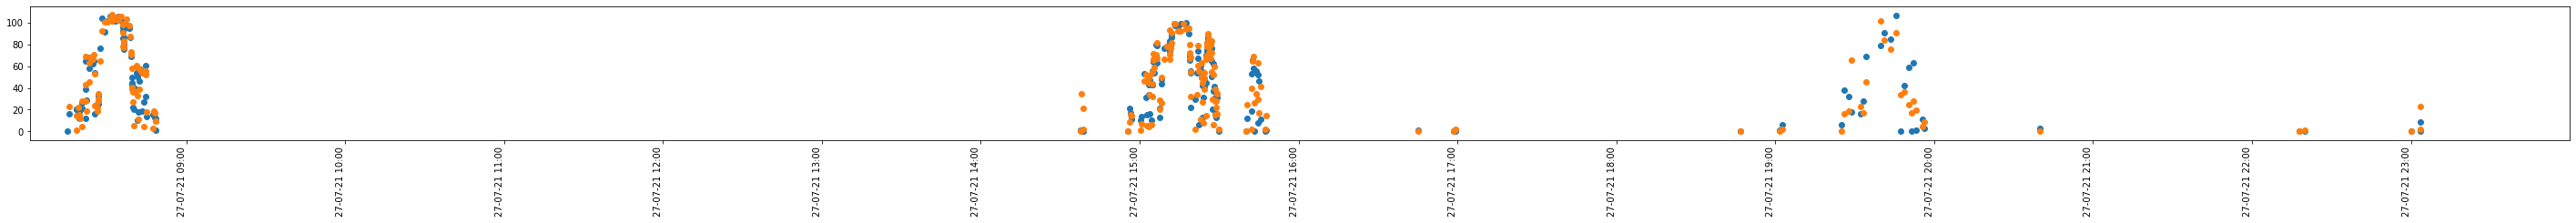

,Date,alt,batPct,gpsAt,heading,lat,lon,speed,latlongTuple,avgSpeed,speedDiff
0,2021-07-27 08:15:02,182,96,2021-07-27T08:15:02Z,102,43.6184,-79.7934,0,"(-79.7934, 43.6184)",NaN,NaN
1,2021-07-27 08:15:50,151,96,2021-07-27T08:15:50Z,140,43.6165,-79.7906,16,"(-79.7906, 43.6165)",23.170197,-7.170197
2,2021-07-27 08:18:26,159,97,2021-07-27T08:18:26Z,142,43.6161,-79.7901,20,"(-79.7901, 43.6161)",1.384318,18.615682
3,2021-07-27 08:18:38,167,97,2021-07-27T08:18:38Z,48,43.6161,-79.7895,20,"(-79.7895, 43.6161)",14.490484,5.509516
4,2021-07-27 08:19:14,165,97,2021-07-27T08:19:14Z,42,43.6174,-79.7874,18,"(-79.7874, 43.6174)",22.242950,-4.242950
...,...,...,...,...,...,...,...,...,...,...,...
219,2021-07-27 22:18:02,117,92,2021-07-27T22:18:02Z,0,43.6271,-79.5322,0,"(-79.5322, 43.6271)",0.049912,-0.049912
220,2021-07-27 22:19:59,68,91,2021-07-27T22:19:59Z,146,43.6271,-79.5325,0,"(-79.5325, 43.6271)",0.742967,-0.742967
221,2021-07-27 23:00:15,68,100,2021-07-27T23:00:15Z,146,43.6271,-79.5325,0,"(-79.5325, 43.6271)",0.000000,0.000000
222,2021-07-27 23:03:34,121,100,2021-07-27T23:03:34Z,12,43.6275,-79.5314,9,"(-79.5314, 43.6275)",1.792416,7.207584


In [299]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates


from matplotlib.pyplot import figure


fig, ax = plt.subplots(1)
fig.autofmt_xdate()

plt.xticks(rotation=90)
plt.scatter(dates, df['speed'])
plt.scatter(dates, df['avgSpeed'])

xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(xfmt)
plt.rcParams["figure.figsize"] = (50,3)

plt.xlim(datetime(2021,7,27,8,1,1),datetime(2021,7,27,23,59,59) )
plt.show()
df

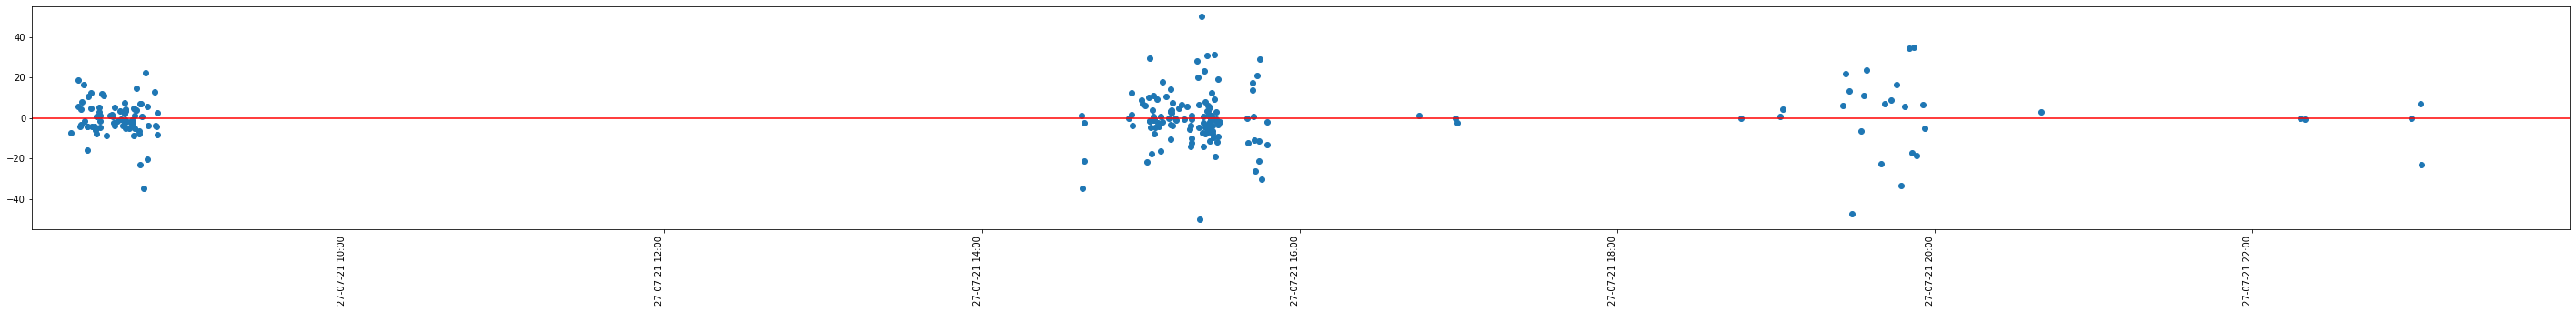

In [296]:
# Calculate the difference between the recorded and the calculated speed
df['speedDiff'] = df['speed'] - df['avgSpeed']

#SpeedDiff negative: Calculated speed higher than recorded speed: Did drive faster than recorded.

fig, ax = plt.subplots(1)
fig.autofmt_xdate()

plt.xticks(rotation=90)
plt.scatter(dates, df['speedDiff'])
plt.axhline(y=0, color ='r', linestyle='-')

xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.rcParams["figure.figsize"] = (50,5)
#figure(figsize=(8, 6), dpi=80)
plt.xlim(datetime(2021,7,27,8,1,1),datetime(2021,7,27,23,59,59) )
plt.show()